# Titanic Survivor Dataset Analysis

In this notebook, I have tried to analyse the Titanic Survivor Dataset from Kaggle. The dataset has been downloaded from Kaggle and stored in the same location as the IPython Notebook.

Some of the questions this Notebook answers are:

    • Who were the passengers on the Titanic? (age, gender, class.. etc)
    • What deck were the passengers on and how does that relate to their class?
    • Where did the passengers come from?
    • Who was alone and who was with family?
    • What factors helped someone survive the sinking?

In [35]:
import pandas as pd
from pandas import Series,DataFrame

In [36]:
# The Titanic dataset downloaded from Kaggle
titanic_df = pd.read_csv('train.csv')

In [37]:
# To see the first few rows of the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Passengers on the Titanic

The graphs below give some demographical information about the passengers aboard.

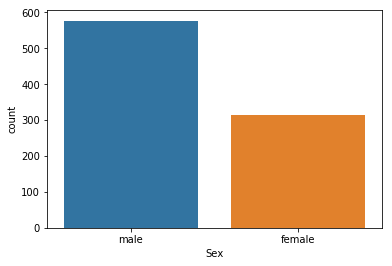

In [40]:
# creating a countplot based on Gender of passengers
sns.countplot('Sex',data=titanic_df)

There were considerably more male passengers aboard.

Now let's see the gender division in each Class.

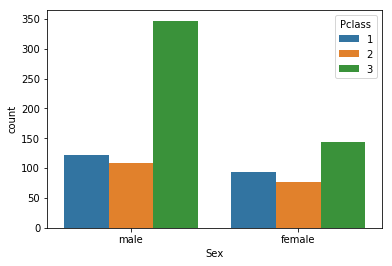

In [41]:
# making a countplot separating the Gender based on the Classes the passengers were traveling in
sns.countplot('Sex',data=titanic_df,hue='Pclass')

It's quite evident from the graph above that the number of males is way higher than that of females especially in the 3rd class.

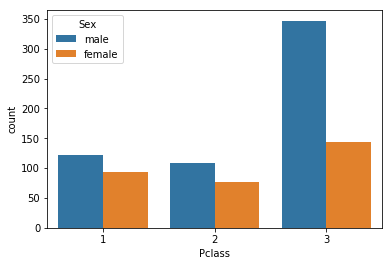

In [42]:
# making a countplot separating the Classes based on the Gender
sns.countplot('Pclass',data=titanic_df,hue='Sex')

There were quite a large number of males in the 3rd class as compared to the 1st and 2nd class.

Now we'll divide the passengers between male, female and child before making any more inferences.

In [43]:
#Function to detect if a person is a man, woman or child.
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [44]:
#Using Pandas' apply method to create a new column "person"
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [45]:
# checking the first 10 rows of the dataset with the newly created "person" column
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


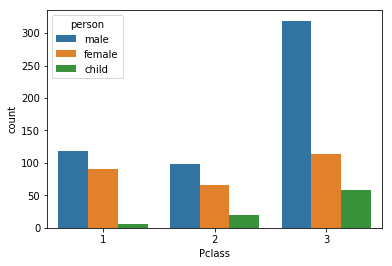

In [46]:
# making a countplot separating the Classes based on the person
sns.countplot('Pclass',data=titanic_df,hue='person')

Interesting, quite a bit of children in 3rd class and not so many in 1st.

Let us create a distribution of the ages to get a more precise picture of the who the passengers were.

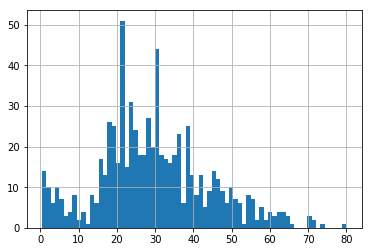

In [47]:
# creating a histogram using pandas
titanic_df['Age'].hist(bins=70)

In [48]:
# finding the mean age of passengers onboard
titanic_df['Age'].mean()

29.69911764705882

In [49]:
# having a quick overall comparison of male,female,child
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

Let's check out how the age distribution varies for different classes. We'll use Seaborn's Facetgrid to plot multiple kedplots on one plot.

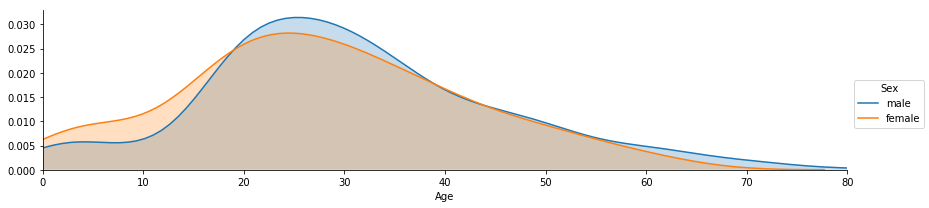

In [50]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

The age distribution seems to be less varied in terms of male and female passengers, though we can say that there more younger females than younger males.

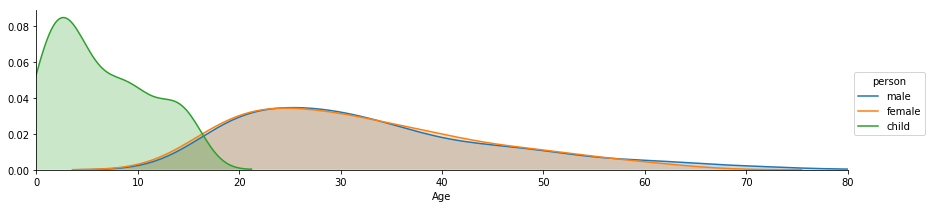

In [51]:
# Let's do the same thing for the 'person' column to include children:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

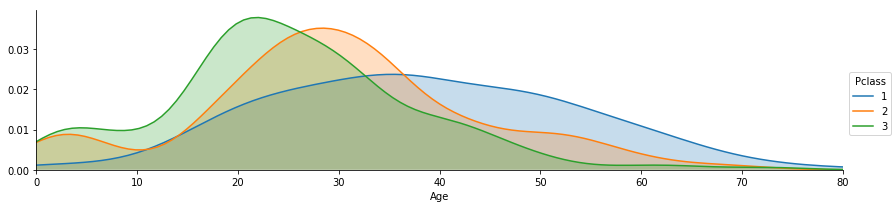

In [52]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

Quite clearly, we can see that the first class passengers belonged more to the middle age groups, with very few children.
Second and third class had more children, with relatively fewer older people.

# What deck were the passengers on and how does that relate to their class?
Let's check out if people belonging to higher classes were assigned cabins on a higher deck (or level) of the ship.

In [53]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


So we can see that the Cabin column has information on the deck, but it has several NaN values, so we'll have to drop them.

In [54]:
# First we'll drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()

In [55]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

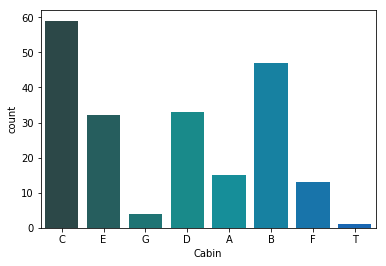

In [56]:
# Since we only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G), 
# So let's grab that letter for the deck level with a simple for loop

levels = []

for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot('Cabin',data=cabin_df,palette='winter_d')
    

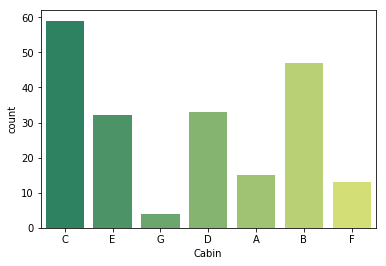

In [57]:
# we have a 'T' deck value there which doesn't make sense, we can drop it out with the following code:
cabin_df = cabin_df[cabin_df.Cabin!='T']
sns.countplot('Cabin',data=cabin_df,palette='summer')

## Where did the passengers come from?
The Embarked attribute contains data for the passengers' port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

In [59]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


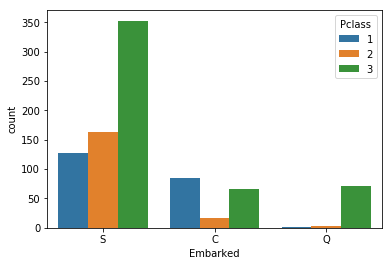

In [66]:
# Now let us make a quick factorplot to check out the results
sns.countplot('Embarked',data=titanic_df,hue='Pclass')

Most of the passengers embarked from Southampton. What's also interesting, is that almost no first or second class passengers embarked from Queenstown, which can tell us something about the socio-economic status of the population of Queenstown.

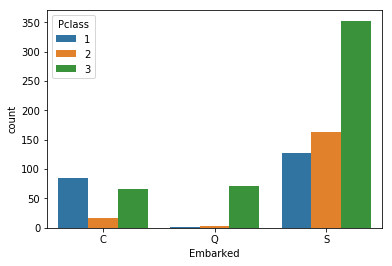

In [67]:
sns.countplot('Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'])

## who was alone and who was with family?

In [69]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


The SibsSP attribute refers to the number of siblings or spouses that a passenger had aboard. Parch refers to the number of parents or children someone had on the ship.

As we're just trying to know if a passenger had someone from his family onboard, we can make our life a bit easier by making another column to represent this data.

In [70]:
# Let's start by adding a new column to define alone

# We'll add the parent/child column with the sibsp column

titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [74]:
titanic_df['Alone']

0      with Family
1      with Family
2            Alone
3      with Family
4            Alone
5            Alone
6            Alone
7      with Family
8      with Family
9      with Family
10     with Family
11           Alone
12           Alone
13     with Family
14           Alone
15           Alone
16     with Family
17           Alone
18     with Family
19           Alone
20           Alone
21           Alone
22           Alone
23           Alone
24     with Family
25     with Family
26           Alone
27     with Family
28           Alone
29           Alone
          ...     
861    with Family
862          Alone
863    with Family
864          Alone
865          Alone
866    with Family
867          Alone
868          Alone
869    with Family
870          Alone
871    with Family
872          Alone
873          Alone
874    with Family
875          Alone
876          Alone
877          Alone
878          Alone
879    with Family
880    with Family
881          Alone
882         

Now we know that if the Alone column is anything but 0, then the passenger had family aboard and wasn't alone. So let's change the column now so that if the value is greater than 0, we know the passenger was with his/her family, otherwise they were alone.

In [72]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'with Family'

titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

/Users/tinaaggarwal/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [75]:
# Note it's okay to ignore an  error that sometimes pops up here. For more info check out this link
url_info = 'http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning'

In [76]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


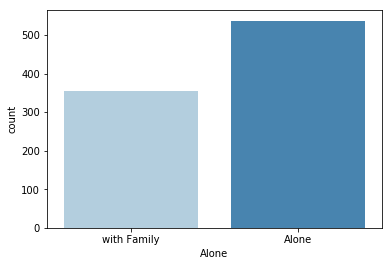

In [78]:
sns.countplot('Alone',data=titanic_df,palette='Blues')

The information is pretty simple to digest now. The majority of people on the ship had family on the ship. But did that make a difference in their chances of survival? We'll answer the question in the next section.

## What factors helped someone survive the sinking?

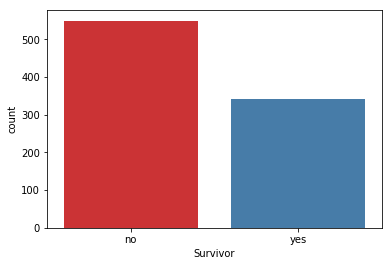

In [80]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

sns.countplot('Survivor',data=titanic_df,palette='Set1')

So quite a few more people died than those who survived. Let's see if the class of the passengers had an effect on their survival rate, since the movie Titanic popularized the notion that the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.

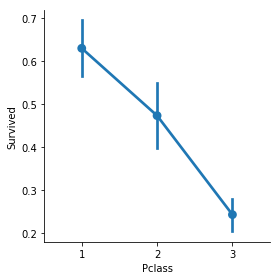

In [83]:
# Let's use a factor plot again, but now considering class
sns.factorplot('Pclass','Survived',data=titanic_df)

Look like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. We will use 'hue' to get a clearer picture on this.

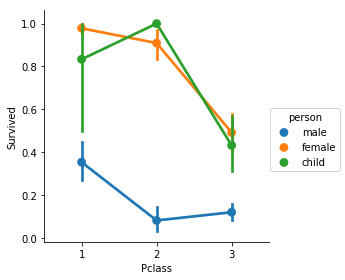

In [85]:
sns.factorplot('Pclass','Survived',data=titanic_df,hue='person')

From this data it looks like being a male or being in 3rd class were both not favourable for survival. Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

But what about age? Did being younger or older have an effect on survival rate?

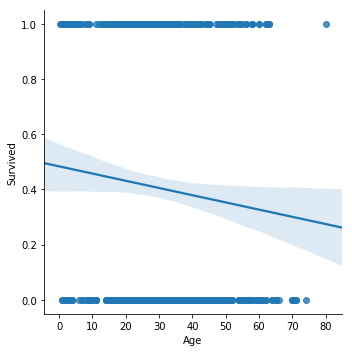

In [87]:
sns.lmplot('Age','Survived',data=titanic_df)

Looks like there is a general trend that the older the passenger was, the less likely they survived. Let's go ahead and use hue to take a look at the effect of class and age.

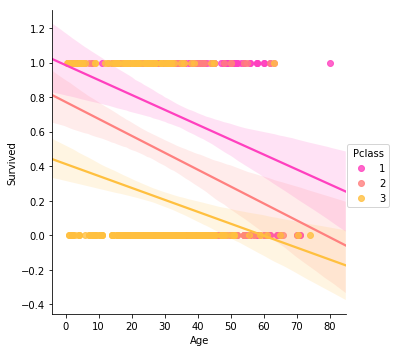

In [90]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='spring')

We can also use the x_bin argument to clean up this figure and grab the data and bin it by age with a std attached!

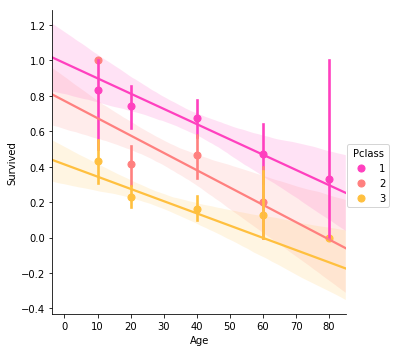

In [91]:
# Let's use a linear plot on age versus survival using hue for class seperation
generations = [10,20,40,60,80]

sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='spring',x_bins=generations)

Interesting find on the older 1st class passengers! What about if we relate gender and age with the survival set?

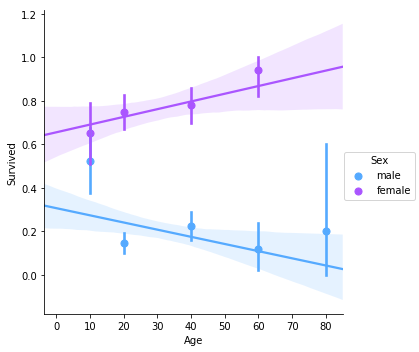

In [92]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='cool',x_bins=generations)

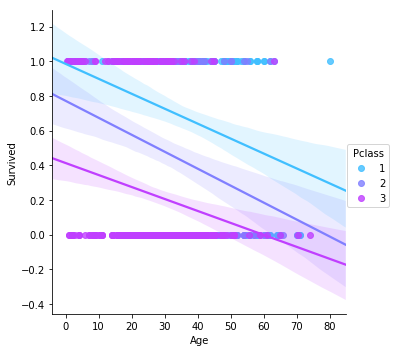

In [95]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='cool')

The general concensus from the above two figures seems to be that older people were less likely to survive.

## Did having a family member increase the odds of surviving the crash?

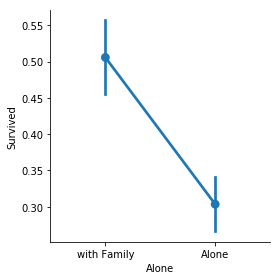

In [96]:
sns.factorplot('Alone','Survived',data=titanic_df)

Seems like if you knew someone on the ship, you had a higher chance of survival, than if you were all alone.